In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
import time
#Supervised
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.svm import LinearSVC
import pickle
#Unsupervised
# Deep Learning
import torch
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Embedding, LSTM, Dropout

In [3]:
sent= pd.read_csv("output/final_tweets.csv")
sent.head()

,target,ids,date,flag,user,text,procesado,Polaridad,Subjetividad,palabras
0,Negativa,2014943573,Wed Jun 03 03:11:56 PDT 2009,NO_QUERY,bexodus,@MissScion Fell asleep around 9p last night wo...,"['fell', 'asleep', 'around', 'last', 'night', ...",-0.016667,0.488889,26
1,Positiva,1971796339,Sat May 30 07:55:06 PDT 2009,NO_QUERY,sazmataz_x,@katie_andhearts going in town later to get my...,"['going', 'town', 'late', 'get', 'prom', 'shoe...",0.250000,0.650000,14
2,Positiva,1978132662,Sat May 30 22:31:29 PDT 2009,NO_QUERY,Deasoy,happy day,"['happy', 'day']",0.800000,1.000000,2
3,Negativa,1679901725,Sat May 02 10:26:43 PDT 2009,NO_QUERY,SashaPanda,Tummy Hurts Stupid Stress,"['tummy', 'hurts', 'stupid', 'stress']",-0.800000,1.000000,4
4,Neutral,2055154954,Sat Jun 06 08:48:06 PDT 2009,NO_QUERY,LianeGentrySkye,@jodywallace Are you at the LF event? I have...,"['event', 'seen']",0.000000,0.000000,11


In [6]:
le = LabelEncoder()
sent["Label_enc"] = le.fit_transform(sent["target"])

# Display the encoded labels
display(sent[["Label_enc"]].head())

# Select the features and the target
X = sent['procesado']
y = sent["Label_enc"]

,Label_enc
0,0
1,2
2,2
3,0
4,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
tfidfstops=stopwords.words('english')
vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidfstops)

# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)

Accuracy: 0.715


In [9]:
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\nMatriz 3x3 donde se ven los tweets que se catalogaron erroneamente\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

Confusion Matrix
Matriz 3x3 donde se ven los tweets que se catalogaron erroneamente

[[230  87 108]
 [ 16 668  54]
 [ 26  52 759]]


Classification Report

              precision    recall  f1-score   support

           0       0.85      0.54      0.66       425
           1       0.83      0.91      0.86       738
           2       0.82      0.91      0.86       837

    accuracy                           0.83      2000
   macro avg       0.83      0.78      0.80      2000
weighted avg       0.83      0.83      0.82      2000



In [10]:
pickle.dump(nb, open("./Outputs/model.pkl", 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: './Outputs/model.pkl'

In [15]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
#KERAS_MODEL = "model.h5"
#WORD2VEC_MODEL = "model.w2v"
#TOKENIZER_MODEL = "tokenizer.pkl"
#ENCODER_MODEL = "encoder.pkl"

In [19]:
train, test = train_test_split(sent, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 8000
TEST size: 2000


In [22]:
train.head()

,target,ids,date,flag,user,text,procesado,Polaridad,Subjetividad,palabras,Label_enc,nLabel
9254,Neutral,2070190399,Sun Jun 07 17:15:09 PDT 2009,NO_QUERY,Aromantic,Who needs whips &amp; chains when you have cak...,"['needs', 'whips', 'amp', 'chains', 'cake']",0.0,0.00,9,1,0
1561,Positiva,1823352144,Sat May 16 21:44:41 PDT 2009,NO_QUERY,KeedyKat,@SouthernBell07 u went to the ol' school for r...,"['went', 'school', 'real', 'one', 'listening',...",0.2,0.30,20,2,1
1670,Negativa,1677113394,Sat May 02 00:30:57 PDT 2009,NO_QUERY,love2live10101,@Traphik Aww I'm sorry! I voted for u! @annspa...,"['aww', 'sorry', 'voted', 'yesterday', 'droppe...",-0.1,0.95,27,0,-1
6087,Neutral,2178448548,Mon Jun 15 07:43:00 PDT 2009,NO_QUERY,liannebigworld,aargh I want to go home but it's raining and I...,"['aargh', 'want', 'home', 'raining', 'bring', ...",0.0,0.00,25,1,0
6669,Negativa,2253553289,Sat Jun 20 08:21:43 PDT 2009,NO_QUERY,bahramd,I'm so tired,['tired'],-0.4,0.70,3,0,-1


In [21]:
def numerar_polaridad(polaridad):
    if polaridad == 'Positiva':
        return 1
    if polaridad == "Neutral":
        return 0
    if polaridad == "Negativa":
        return -1

train["nLabel"] = train["target"].apply(numerar_polaridad)
test["nLabel"] = test["target"].apply(numerar_polaridad)

<ipython-input-21-d29626858213>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["nLabel"] = train["target"].apply(numerar_polaridad)
<ipython-input-21-d29626858213>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["nLabel"] = test["target"].apply(numerar_polaridad)


In [24]:
train.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'procesado',
       'Polaridad', 'Subjetividad', 'palabras', 'Label_enc', 'nLabel'],
      dtype='object')

In [26]:
train.drop(columns = ['target', 'ids', 'date', 'flag','Polaridad', 'Subjetividad', 'palabras'])

,user,text,procesado,Label_enc,nLabel
9254,Aromantic,Who needs whips &amp; chains when you have cak...,"['needs', 'whips', 'amp', 'chains', 'cake']",1,0
1561,KeedyKat,@SouthernBell07 u went to the ol' school for r...,"['went', 'school', 'real', 'one', 'listening',...",2,1
1670,love2live10101,@Traphik Aww I'm sorry! I voted for u! @annspa...,"['aww', 'sorry', 'voted', 'yesterday', 'droppe...",0,-1
6087,liannebigworld,aargh I want to go home but it's raining and I...,"['aargh', 'want', 'home', 'raining', 'bring', ...",1,0
6669,bahramd,I'm so tired,['tired'],0,-1
...,...,...,...,...,...
5734,drea89,its super hot and i have a headache,"['super', 'hot', 'headache']",2,1
5191,mofabul0us,Wow I was winning beer pong but no longer,"['wow', 'winning', 'beer', 'pong', 'long']",2,1
5390,NKANGEL74,@troykids yay that's great,"['yay', 'great']",2,1
860,paulinewood,My Mum is coming home from hospital today afte...,"['mum', 'coming', 'home', 'hospital', 'today',...",2,1


In [27]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(train['text'][:2000], train['nLabel'][:2000], test_size=0.2)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Model: 0.588125 using {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.563125 Stdev:(0.034055) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.588125 Stdev:(0.032410) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.555000 Stdev:(0.036954) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.575000 Stdev:(0.030362) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.559375 Stdev:(0.031156) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.585000 Stdev:(0.033680) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.552500 Stdev:(0.038345) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.570000 Stdev:(0.028614) with: {'bow__ngram_range'

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.7s finished


In [29]:
import joblib
joblib.dump(grid, "./input/twitter_sentiment.pkl")

['./input/twitter_sentiment.pkl']

In [30]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("./input/twitter_sentiment.pkl")

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.65


confusion matrix: 
 [[ 43  19  26]
 [ 16  81  54]
 [ 11  14 136]]


              precision    recall  f1-score   support

          -1       0.61      0.49      0.54        88
           0       0.71      0.54      0.61       151
           1       0.63      0.84      0.72       161

    accuracy                           0.65       400
   macro avg       0.65      0.62      0.63       400
weighted avg       0.66      0.65      0.64       400



In [32]:
tweet_preds = model_NB.predict(sent['text'])

# append predictions to dataframe
df_tweet_preds = sent.copy()
df_tweet_preds['predictions'] = tweet_preds
df_tweet_preds.shape

(10000, 12)

In [34]:
import random
# print text and sentiment

index = random.sample(range(tweet_preds.shape[0]), 20)
for text, sentiment in zip(df_tweet_preds.text[index],
                           df_tweet_preds.predictions[index]):
    print (sentiment, '--', text, '\n')

-1 -- @dreambunny34d well how can we get your horny half full?  

1 -- awww tireeeed,night ppl  

1 -- Gonna Make A Video With Ash's New Song  

1 -- @mileycyrus Please do another concert in Manchester in UK. Could not buy tickets and really me and my mates want to go your concert.  

1 -- @MzEsha lol ok great cutie  

1 -- maths exam didn't go well. i think i have a lot mistakes   A really busy day in school today. so i'll tweet u this eveneing. keep tweeting 

1 -- @dgritsko      travel safely! 

1 -- @RSD_Sufferer Thank you! lol  

1 -- @NurseHunter you just need to register. Then email your blog to victoria.thompson@Emap.com - look forward to it  

0 -- @wickedgoddess Happened to me too. Boo. No Blizzcon.  

1 -- tmrw night The DOMINATION starts up a new week 6-7pm est.   

0 -- shower, charity event, home.  textt itt. &lt;3 

1 -- PRAISE THE LORD!!!!!  i love the lord! i really do  x 

1 -- These fire alarm and sprinkler people are the slowest people in the world. 2 hours later an

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def polarity_scores_all(tweet):
  '''
  Takes string of text to:
  1. Gets sentiment metrics
  2. Returns negative, neutral, positive 
  and compound scores as lists.
  '''
  neg, neu, pos, compound = [], [], [], []
  analyser = SentimentIntensityAnalyzer()
  
  for message in tweet:
    dict_ = analyser.polarity_scores(message)
    neg.append(dict_['neg'])
    neu.append(dict_['neu'])
    pos.append(dict_['pos'])
    compound.append(dict_['compound'])
  
  return neg, neu, pos, compound

In [72]:
all_scores = polarity_scores_all(train.procesado.values)
train['neg_scores'] = all_scores[0]
train['neu_scores'] = all_scores[1]
train['pos_scores'] = all_scores[2]
train['compound_scores'] = all_scores[3]

train.head(10)

TypeError: 'float' object is not iterable

In [39]:
pos_family = {  
    'NOUN' : ['NN','NNS','NNP'], # Removed 'NNPS'
    'PRON' : ['PRP','PRP$','WP'],
    'VERB' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'ADJ' :  ['JJ','JJR','JJS'],
    'ADV' : ['RB','RBR','RBS','WRB']
}

def count_pos_tag(tweets):
  '''
  Takes string of text to:
  1. Processes text and attaches POS tags
  2. Input the dictionary of POS tags into a Counter.
  2. Returns list of POS tags with occurrence number '''
  total_count = []
  for s in tweets:
    partial_count = {}
    s = s.split()
    count_pos = Counter(dict(nltk.pos_tag(s)).values())
    
    for item, value in count_pos.items():
      partial_count[item] = partial_count.get(item, 0) + 1
            
    total_count.append(partial_count)

  return total_count

In [42]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fernandodelgadoteran/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [43]:
# Retrieve POS tags with occurrence 
total_count = count_pos_tag(train.text.values)
# As dataframe 
pos_df = pd.DataFrame(total_count)
# Remove unwanted characters
# Inspection
pos_df.reindex

<bound method DataFrame.reindex of        WP  VBZ  NNS   NN  WRB  PRP  VBP   JJ  VBD   TO  ...  PDT  SYM   ,   $  \
0     1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN  NaN  NaN  ...  NaN  NaN NaN NaN   
1     1.0  NaN  NaN  1.0  NaN  NaN  NaN  1.0  1.0  1.0  ...  NaN  NaN NaN NaN   
2     NaN  NaN  NaN  1.0  NaN  1.0  1.0  1.0  1.0  NaN  ...  NaN  NaN NaN NaN   
3     NaN  NaN  NaN  1.0  NaN  1.0  1.0  1.0  NaN  1.0  ...  NaN  NaN NaN NaN   
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  ...  NaN  NaN NaN NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..   
7995  NaN  NaN  1.0  1.0  NaN  NaN  1.0  1.0  NaN  NaN  ...  NaN  NaN NaN NaN   
7996  NaN  NaN  1.0  1.0  NaN  1.0  NaN  NaN  1.0  NaN  ...  NaN  NaN NaN NaN   
7997  NaN  NaN  1.0  NaN  NaN  NaN  1.0  1.0  NaN  NaN  ...  NaN  NaN NaN NaN   
7998  NaN  1.0  1.0  1.0  NaN  1.0  1.0  1.0  NaN  NaN  ...  NaN  NaN NaN NaN   
7999  NaN  NaN  NaN  1.0  NaN  1.0  1.0  NaN  NaN  NaN  ...  NaN  NaN NaN 

In [44]:
pos_df['NOUN'] = pos_df[pos_family['NOUN']].sum(axis=1)
pos_df['PRON'] = pos_df[pos_family['PRON']].sum(axis=1)
pos_df['VERB'] = pos_df[pos_family['VERB']].sum(axis=1)
pos_df['ADJ'] = pos_df[pos_family['ADJ']].sum(axis=1)
pos_df['ADV'] = pos_df[pos_family['ADV']].sum(axis=1)

pos_df = pos_df[['NOUN', 'PRON', 'VERB', 'ADJ', 'ADV']]

In [45]:
train = pd.concat([train, pos_df], axis = 1)
train = train.fillna(value=0.0)
train

,target,ids,date,flag,user,text,procesado,Polaridad,Subjetividad,palabras,...,nLabel,neg_scores,neu_scores,pos_scores,compound_scores,NOUN,PRON,VERB,ADJ,ADV
0,0,0.000000e+00,0,0,0,0,0,0.000,0.00,0.0,...,0.0,0.0,0.000,0.000,0.0000,2.0,2.0,2.0,0.0,1.0
1,Positiva,1.971796e+09,Sat May 30 07:55:06 PDT 2009,NO_QUERY,sazmataz_x,@katie_andhearts going in town later to get my...,"['going', 'town', 'late', 'get', 'prom', 'shoe...",0.250,0.65,14.0,...,1.0,0.0,0.714,0.286,0.4215,1.0,1.0,3.0,1.0,0.0
2,Positiva,1.978133e+09,Sat May 30 22:31:29 PDT 2009,NO_QUERY,Deasoy,happy day,"['happy', 'day']",0.800,1.00,2.0,...,1.0,0.0,0.213,0.787,0.5719,2.0,2.0,3.0,1.0,1.0
3,0,0.000000e+00,0,0,0,0,0,0.000,0.00,0.0,...,0.0,0.0,0.000,0.000,0.0000,1.0,1.0,3.0,1.0,0.0
4,Neutral,2.055155e+09,Sat Jun 06 08:48:06 PDT 2009,NO_QUERY,LianeGentrySkye,@jodywallace Are you at the LF event? I have...,"['event', 'seen']",0.000,0.00,11.0,...,0.0,0.0,1.000,0.000,0.0000,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Positiva,2.054290e+09,Sat Jun 06 07:01:16 PDT 2009,NO_QUERY,goodlaura,@TrippK I don't know how you manage with so ma...,"['know', 'manage', 'many', 'blessings', 'see',...",0.500,0.50,16.0,...,1.0,0.0,0.588,0.412,0.5423,0.0,0.0,0.0,0.0,0.0
9995,Neutral,1.677875e+09,Sat May 02 04:27:04 PDT 2009,NO_QUERY,Angfergie,@TheRealJordin Kat Von D's makeup rox too!,"['kat', 'von', 'makeup', 'rox']",0.000,0.00,7.0,...,0.0,0.0,1.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0
9996,Neutral,1.961466e+09,Fri May 29 09:32:43 PDT 2009,NO_QUERY,Shashlye,..well OUR monkeys!! Yay!!!,"['well', 'monkeys', 'yay']",0.000,0.00,4.0,...,0.0,0.0,0.154,0.846,0.6705,0.0,0.0,0.0,0.0,0.0
9997,Positiva,1.991740e+09,Mon Jun 01 07:34:48 PDT 2009,NO_QUERY,officialpeta,"@TradingGoddess Aww, she's beautiful! My cats...","['aww', 'beautiful', 'cats', 'like', 'newspape...",0.575,0.95,15.0,...,1.0,0.0,0.484,0.516,0.7506,0.0,0.0,0.0,0.0,0.0


In [47]:
train.drop_duplicates(subset=['text'], inplace=True)

In [48]:
train.to_csv('./output/feat_train_data.csv', index=False)

In [49]:
train.isnull().values.any()
train_prep=train.copy()
train_prep.head()

,target,ids,date,flag,user,text,procesado,Polaridad,Subjetividad,palabras,...,nLabel,neg_scores,neu_scores,pos_scores,compound_scores,NOUN,PRON,VERB,ADJ,ADV
0,0,0.000000e+00,0,0,0,0,0,0.00,0.00,0.0,...,0.0,0.0,0.000,0.000,0.0000,2.0,2.0,2.0,0.0,1.0
1,Positiva,1.971796e+09,Sat May 30 07:55:06 PDT 2009,NO_QUERY,sazmataz_x,@katie_andhearts going in town later to get my...,"['going', 'town', 'late', 'get', 'prom', 'shoe...",0.25,0.65,14.0,...,1.0,0.0,0.714,0.286,0.4215,1.0,1.0,3.0,1.0,0.0
2,Positiva,1.978133e+09,Sat May 30 22:31:29 PDT 2009,NO_QUERY,Deasoy,happy day,"['happy', 'day']",0.80,1.00,2.0,...,1.0,0.0,0.213,0.787,0.5719,2.0,2.0,3.0,1.0,1.0
4,Neutral,2.055155e+09,Sat Jun 06 08:48:06 PDT 2009,NO_QUERY,LianeGentrySkye,@jodywallace Are you at the LF event? I have...,"['event', 'seen']",0.00,0.00,11.0,...,0.0,0.0,1.000,0.000,0.0000,1.0,0.0,1.0,0.0,1.0
5,Positiva,2.066500e+09,Sun Jun 07 10:38:18 PDT 2009,NO_QUERY,darkrumblog,"@Fleshworks Excellent, very good indeed! Am p...","['excellent', 'good', 'indeed', 'posting']",0.85,0.80,9.0,...,1.0,0.0,0.233,0.767,0.7650,2.0,0.0,0.0,0.0,0.0


In [73]:
# Extracting Features
features = ['text', 'neu_scores', 'neg_scores', 'compound_scores', 'pos_scores']
label = ['nLabel']
# Saving features and label data in X and y for train-test split
X = train_prep[[col for col in train_prep.columns if col in features]]
y = train_prep[label]

X.shape, y.shape

((7998, 5), (7998, 1))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Shapes are {} and {}".format(X_train.shape, X_test.shape))

Shapes are (5598, 5) and (2400, 5)


In [75]:
pd.Series(y_train.values.ravel()).value_counts(normalize=True)
pd.Series(y_train.values.ravel()).value_counts(normalize=True)

 1.0    0.419078
 0.0    0.371383
-1.0    0.209539
dtype: float64

In [76]:
#el dataset tiene una probabilidad de acertar del 42% si es positivo,...

In [77]:
# Helper functions

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [78]:
# Pipeline to convert tweets to a matrix of TF-IDF features.
tfidf = Pipeline([
                ('selector', TextSelector(key='text')),
                ('tfidf', TfidfVectorizer())
            ])

# Pipeline to convert tweets to a matrix of token counts
countvect = Pipeline([
                ('selector', TextSelector(key='text')),
                ('countvect', CountVectorizer())
            ])

In [79]:
# Applying tfidf anf countvec to features

neu_scores =  Pipeline([
                ('selector', NumberSelector(key='neu_scores')),
                ('minmax', MinMaxScaler())
            ])
neg_scores =  Pipeline([
                ('selector', NumberSelector(key='neg_scores')),
                ('minmax', MinMaxScaler())
            ])
pos_scores =  Pipeline([
                ('selector', NumberSelector(key='pos_scores')),
                ('minmax', MinMaxScaler())
            ])

compound_scores =  Pipeline([
                ('selector', NumberSelector(key='compound_scores')),
                ('minmax', MinMaxScaler())
            ])

In [80]:
# defining different sets of text processors
def features_union(textProcessor):
    return FeatureUnion([('text', textProcessor),
                      ('neu_scores', neu_scores),
                      ('neg_scores', neg_scores),
                      ('pos_scores', pos_scores),
                      ('compound_scores', compound_scores)])

In [81]:
le = LabelEncoder().fit(y_train.values.ravel())

y_train = le.transform(y_train.values.ravel())
y_test = le.transform(y_test.values.ravel())

X_train.shape, X_test.shape

((5598, 5), (2400, 5))

# Clasificador bayes


In [87]:
# instantiate classifier
clf = MultinomialNB()

# combine features
features_count = features_union(countvect)

# define pipeline object 
nb_pipeline = Pipeline([('features', features_count),
                       ('nb', clf)])

# Fit classifier
nb_pipeline.fit(X_train.astype(str), y_train)

# score
nb_pipeline.score(X_test, y_test)

0.6991666666666667

In [86]:
# instantiate classifier
svm = LinearSVC()

#  combine features
features_tfidf = features_union(tfidf)

# define pipeline object
svm_pipeline = Pipeline([('features', features_tfidf),
                       ('svm', svm)])

# Fit classifier
svm_pipeline.fit(X_train.astype(str), y_train)

# score
svm_pipeline.score(X_test, y_test)

0.8541666666666666

In [88]:
# Naive Bayes Classifier

# combine features
features_tfidf = features_union(tfidf)

# instantiate pipeline object
nb_pipeline = Pipeline([('feats', features_tfidf),  ('clf', MultinomialNB())])

# parameter grid (3x3x2x2x3x3x2) combinations
parameters = {
    'feats__text__tfidf__max_df': (0.5, 0.75, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2), (2, 2)), 
    'feats__text__tfidf__use_idf': (False, True),
    'feats__text__tfidf__binary':(False, True),
    'feats__text__tfidf__binary':('l1', 'l2', None),
    'clf__alpha': (1.0, 5.0, 10.0),
    'clf__fit_prior': (True, False),     
}

# instantiate GridSearchCV object with pipeline and parameters with 3-folds cross-validation
nb_grid = GridSearchCV(nb_pipeline, parameters, cv=3) # this takes a while :/

# start time 
nb_start = time.time()

# Fit 
nb_grid.fit(X_train.astype(str), y_train)

# end time 
svm_end = time.time()
print(f"Time taken to run: {round((svm_end - nb_start)/60,1)} minutes")

# Check score
nb_grid.score(X_test, y_test)

Time taken to run: 3.2 minutes


0.68625

In [89]:
print('Best params: {}'.format(nb_grid.best_params_))
nb_cv_results = pd.DataFrame(nb_grid.cv_results_)
nb_cv_results.head(3)

Best params: {'clf__alpha': 1.0, 'clf__fit_prior': False, 'feats__text__tfidf__binary': 'l1', 'feats__text__tfidf__max_df': 0.5, 'feats__text__tfidf__ngram_range': (1, 1), 'feats__text__tfidf__use_idf': True}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__fit_prior,param_feats__text__tfidf__binary,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_feats__text__tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088420,0.006950,0.034165,0.001112,1,True,l1,0.5,"(1, 1)",False,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.595391,0.608253,0.609861,0.604502,0.006475,91
1,0.086189,0.002420,0.038717,0.003986,1,True,l1,0.5,"(1, 1)",True,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.610397,0.628081,0.627010,0.621829,0.008096,73
2,0.200385,0.001798,0.058952,0.004798,1,True,l1,0.5,"(1, 2)",False,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.536977,0.549303,0.536442,0.540907,0.005941,181


In [98]:
# Support Vector Classifier

# combine features
features_count = features_union(tfidf)

# instantiate pipeline
svm_count_pipeline = Pipeline([('feats', features_count),  ('clf', LinearSVC(max_iter=10000))])

# parameter grid (3x3x2x3x7x2) combinations
parameters = {
    'feats__text__tfidf__max_df': (0.5, 0.75, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2), (2, 2)), 
    'feats__text__tfidf__use_idf': (False, True),
    'clf__loss': ('hinge', 'squared_hinge'),
    'clf__C': (0.1, 0.5, 0.6, 1, 4, 5, 10, 100),
    'clf__class_weight': (None, 'balanced')                                    
}

# instantiate GridSearchCV object with pipeline and parameters with 3-folds cross-validation
svm_grid = GridSearchCV(svm_count_pipeline, parameters, cv=3)

# start time 
svm_start = time.time()

# fit
svm_grid.fit(X_train.astype(str), y_train)

# end time 
svm_end = time.time()
print(f"Time taken to run: {round((svm_end - svm_start)/60,1)} minutes")

# score
svm_grid.score(X_test, y_test)

Time taken to run: 11.0 minutes


0.8758333333333334

In [97]:
#svm_grid.score(X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [99]:
print('Best params: {}'.format(svm_grid.best_params_))
svm_cv_results = pd.DataFrame(svm_grid.cv_results_)
svm_cv_results.head(3)

Best params: {'clf__C': 4, 'clf__class_weight': None, 'clf__loss': 'hinge', 'feats__text__tfidf__max_df': 0.5, 'feats__text__tfidf__ngram_range': (1, 1), 'feats__text__tfidf__use_idf': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__class_weight,param_clf__loss,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_feats__text__tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099182,0.007122,0.035325,0.001046,0.1,None,hinge,0.5,"(1, 1)",False,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.730975,0.698285,0.716506,0.715255,0.013375,364
1,0.107523,0.008120,0.037750,0.000495,0.1,None,hinge,0.5,"(1, 1)",True,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.727760,0.696141,0.713290,0.712397,0.012924,397
2,0.214999,0.011389,0.057595,0.002108,0.1,None,hinge,0.5,"(1, 2)",False,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.727760,0.692390,0.713290,0.711147,0.014519,427


In [101]:
joblib.dump(nb_grid, "./output/twitter_sentiment_naivebayes.pkl")
print('Naive Bayes Classifier saved')
joblib.dump(svm_grid, "./output/twitter_sentiment_svm.pkl")
print('SVM Classifier saved')

Naive Bayes Classifier saved
SVM Classifier saved


In [103]:
# Get and save predictions from best models above

# Naive Bayes
y_preds_nb = nb_grid.predict(X_test)
# Save predictions for evaluation as numpy arrays
np.save('./output/y_predsNB.npy', y_preds_nb)

# Support Vector Machine
y_preds_svm = svm_grid.predict(X_test)
# Save predictions for evaluation as numpy arrays
np.save('./output/y_predsSVM.npy', y_preds_svm)

In [104]:
# Guardar dataset para evaluacion
np.save('./output/y_test.npy', y_test)

# DEEP LEARNING

In [120]:
# Parameter indicating the number of words
nb_words = 10000  

## create the tokenizer (tweets have been preprocessed so no need for filters)
tk = Tokenizer(num_words=nb_words)

# fit the tokenizer on tweets
tk.fit_on_texts(train_prep.text.astype(str))

# integer encode tweets
tweets_seq = tk.texts_to_sequences(train_prep.text.astype(str))

In [121]:
train_prep['palabras']=sent['palabras']

In [122]:
train_prep['palabras'].describe()

count    7998.000000
mean       13.196049
std         6.939516
min         1.000000
25%         7.000000
50%        12.000000
75%        19.000000
max        34.000000
Name: palabras, dtype: float64

## Cada batch debe tener secuencias de la misma longitud, esto se logra con el metodo pad_sequences, especificando la longitud sera acolchada con ceros o se truncara

In [123]:
# Maximum length since maximum tweet word count is 28.
max_len = 28

# Convert sequences into 2-D Numpy arrays
features = pad_sequences(tweets_seq, maxlen=max_len)

In [124]:
# test statements 
assert len(features)==len(tweets_seq), "The features should have as many rows as tweets."
assert len(features[0])==max_len, "Each feature row should contain the mex length of values."

In [125]:
# to hot-encode
train_prep["nLabel"] = train_prep["nLabel"].astype("category")
train_prep.nLabel.describe

<bound method NDFrame.describe of 0       0.0
1       1.0
2       1.0
4       0.0
5       1.0
       ... 
9994    1.0
9995    0.0
9996    0.0
9997    1.0
9999    1.0
Name: nLabel, Length: 7998, dtype: category
Categories (3, float64): [-1.0, 0.0, 1.0]>

In [128]:
## split data into training and test data (features and labels, x and y)
# data needs to be as array
labels = pd.get_dummies(train_prep['nLabel']).values
#labels = np.asarray(train_prep.label.values)

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

## print out the shapes of the resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set X: \t\t{}".format(X_train.shape),
      "\nTrain set Y: \t\t{}".format(Y_train.shape),
      "\nTest set X: \t\t{}".format(X_test.shape),
      "\nTest set Y: \t\t{}".format(Y_test.shape))

			Feature Shapes:
Train set X: 		(6398, 28) 
Train set Y: 		(6398, 3) 
Test set X: 		(1600, 28) 
Test set Y: 		(1600, 3)


# LSTM Network with Keras

In [129]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [130]:
from keras.layers import Dense, Embedding, LSTM, Dropout

#--- Parameters----#

# encodes input sequence dense vectors 
embed_dim = 128

# transforms the vector sequence into a single vector
lstm_out = 200

# batch size of 32 is a good starting point
batch_size = 32

# epochs
epochs = 10

#------# Build the LSTM model #-----------------#

print('Building model...') 

# Initialising the RNN
model = Sequential()

#adding an input layer and the first hidden layer
model.add(Embedding(10000, embed_dim, 
                    input_length = features.shape[1], 
                   )) 
model.add(Dropout(0.2))
# Adding the second hidden layer
model.add(LSTM(lstm_out))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile( optimizer='adam', # optimazer
              loss = 'categorical_crossentropy', # loss function
              metrics = ['accuracy']) # list of metrics

model._name = 'modeloKeras'
print(model.summary())

Building model...
Model: "modeloKeras"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 128)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               263200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
Total params: 1,543,803
Trainable params: 1,543,803
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
# Fit the model
history = model.fit(X_train, Y_train, 
                    validation_split=0.33, 
                    batch_size = batch_size, 
                    epochs = epochs, verbose = True)

Epoch 1/10
134/134 [==============================] - 5s 35ms/step - loss: 0.9267 - accuracy: 0.5639 - val_loss: 0.7803 - val_accuracy: 0.6719
Epoch 2/10
134/134 [==============================] - 4s 33ms/step - loss: 0.4185 - accuracy: 0.8467 - val_loss: 0.4819 - val_accuracy: 0.8305
Epoch 3/10
134/134 [==============================] - 5s 35ms/step - loss: 0.1451 - accuracy: 0.9620 - val_loss: 0.5319 - val_accuracy: 0.8097
Epoch 4/10
134/134 [==============================] - 5s 35ms/step - loss: 0.0633 - accuracy: 0.9865 - val_loss: 0.6197 - val_accuracy: 0.8272
Epoch 5/10
134/134 [==============================] - 5s 36ms/step - loss: 0.0374 - accuracy: 0.9900 - val_loss: 0.6072 - val_accuracy: 0.8234
Epoch 6/10
134/134 [==============================] - 5s 38ms/step - loss: 0.0240 - accuracy: 0.9942 - val_loss: 0.6999 - val_accuracy: 0.8106
Epoch 7/10
134/134 [==============================] - 5s 37ms/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.8877 - val_accuracy: 0.8101

In [132]:
def eval_metric(model, history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, epochs + 1)

    plt.plot(e, metric, 'ro', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'r', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()


def optimal_epoch(model_hist):
    '''
    Function to return the epoch number where the validation loss is
    at its minimum
    
    Parameters:
        model_hist : training history of model
    Output:
        epoch number with minimum validation loss
    '''
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    print("Minimum validation loss reached in epoch {}".format(min_epoch))
    return min_epoch

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=epochs
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    print()
    print('Test accuracy: {0:.2f}%'.format(results[1]*100))
    return results

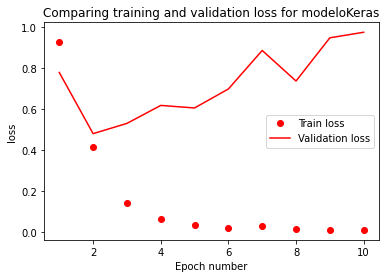

Minimum validation loss reached in epoch 2
2


In [133]:
import matplotlib.pyplot as plt

eval_metric(model, history, 'loss')
print(optimal_epoch(history))

In [134]:
# Applying regularisation

print('Building model...') 

reg_model = Sequential()
reg_model.add(Embedding(15000, embed_dim, input_length = features.shape[1]))
model.add(Dropout(0.2))
reg_model.add(LSTM(lstm_out))
reg_model.add(Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='softmax'))

# Compile model
reg_model.compile( optimizer='adam', # optimazer
              loss = 'categorical_crossentropy', # loss function
              metrics = ['accuracy']) # list of metrics

model._name = 'modeloKerasreg'
print(reg_model.summary())

Building model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 128)           1920000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 2,183,803
Trainable params: 2,183,803
Non-trainable params: 0
_________________________________________________________________
None


In [135]:
# Fit the model
reg_history = reg_model.fit(X_train, Y_train, 
                    validation_split=0.33, 
                    batch_size = epochs, 
                    epochs = epochs, verbose = True)

Epoch 1/10
429/429 [==============================] - 11s 25ms/step - loss: 0.8134 - accuracy: 0.6377 - val_loss: 0.5604 - val_accuracy: 0.7945
Epoch 2/10
429/429 [==============================] - 11s 27ms/step - loss: 0.2861 - accuracy: 0.9092 - val_loss: 0.4675 - val_accuracy: 0.8362
Epoch 3/10
429/429 [==============================] - 11s 25ms/step - loss: 0.1170 - accuracy: 0.9692 - val_loss: 0.4749 - val_accuracy: 0.8494
Epoch 4/10
429/429 [==============================] - 11s 26ms/step - loss: 0.0740 - accuracy: 0.9813 - val_loss: 0.6051 - val_accuracy: 0.8452
Epoch 5/10
429/429 [==============================] - 14s 32ms/step - loss: 0.0506 - accuracy: 0.9904 - val_loss: 0.6005 - val_accuracy: 0.8485
Epoch 6/10
429/429 [==============================] - 14s 33ms/step - loss: 0.0414 - accuracy: 0.9897 - val_loss: 0.6768 - val_accuracy: 0.8177
Epoch 7/10
429/429 [==============================] - 17s 39ms/step - loss: 0.0314 - accuracy: 0.9939 - val_loss: 0.6804 - val_accuracy:

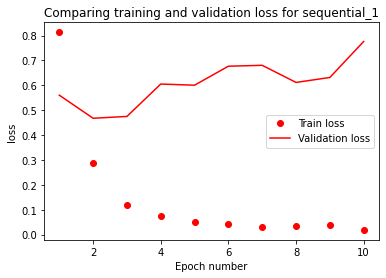

Minimum validation loss reached in epoch 2
2


In [136]:
eval_metric(reg_model, reg_history, 'loss')
print(optimal_epoch(reg_history))

In [137]:
# Optimal epochs
base_min = 1 # first model
reg_min = 2 # model with regularisation

# Training on the full train data and evaluation on test data on first model
base_results = test_model(model, X_train, Y_train, X_test, Y_test, base_min)

50/50 [==============================] - 0s 8ms/step - loss: 0.3926 - accuracy: 0.8813

Test accuracy: 88.13%


In [138]:
# Training on second model with regularisation and evaluation on data on second model
reg_results = test_model(reg_model, X_train, Y_train, X_test, Y_test, reg_min)

50/50 [==============================] - 0s 10ms/step - loss: 0.5195 - accuracy: 0.8531

Test accuracy: 85.31%


In [139]:
#save first model and architecture
model.save('./modelos/LSTM_model.h5')
print('Saved LSTM model to models folder')

# save second model and architecture
reg_model.save('./modelos/LSTM_regmodel.h5')
print('Saved LSTM model to models folder')

Saved LSTM model to models folder
Saved LSTM model to models folder


In [140]:
# saving predictions
X_train, X_test, Y_train, Y_test

#-- LSTM model ----#
y_preds_LSTM = model.predict(X_test)

# Save predictions for evaluation as numpy arrays
np.save('./predictions/y_predsLSTM.npy', y_preds_LSTM)

#-- LSTM with regularisation model ----#
y_preds_LSTMreg = reg_model.predict(X_test)

# Save predictions for evaluation as numpy arrays
np.save('./predictions/y_predsLSTMreg.npy', y_preds_LSTMreg)

# Save test data
np.save('./output/y_testLSTM.npy', Y_test)